## 機器學習100天——第2天：簡單線性迴歸 (Simple Linear Regression)
--- 

### 第一步：數據前處理

這裡的步驟觀念可詳見[Day 1](http://localhost:8888/notebooks/Documents/GitHub/100-Days-Of-ML-Code/ipynb_zh-TW/Day%201%20-%20Data_Preprocessing.ipynb)，相較Day 1這裡多導入了matplotlib，是一個python上的2D繪圖庫，作為後面結果視覺化而用。 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('../datasets/studentscores.csv')
print(dataset)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


.iloc可以很靈活地從data frame中選擇想要的元素，第一個參數為列，第二個為行

In [2]:
X = dataset.iloc[ : , :1 ].values #全列，第一行
Y = dataset.iloc[ : , 1 ].values #全列，第二行
print('X:')
print(X)
print('Y:')
print(Y)

X:
[[ 2.5]
 [ 5.1]
 [ 3.2]
 [ 8.5]
 [ 3.5]
 [ 1.5]
 [ 9.2]
 [ 5.5]
 [ 8.3]
 [ 2.7]
 [ 7.7]
 [ 5.9]
 [ 4.5]
 [ 3.3]
 [ 1.1]
 [ 8.9]
 [ 2.5]
 [ 1.9]
 [ 6.1]
 [ 7.4]
 [ 2.7]
 [ 4.8]
 [ 3.8]
 [ 6.9]
 [ 7.8]]
Y:
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76 86]


同Day 1 原版為導入sklearn.cross_validation但sklearn未來會將此更新，故這裡為sklearn.model_selection才不會噴緊告或error。  
切1/4為test

In [3]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0) 

### 第二步：訓練集使用簡單線性回歸模型來訓練

從sklearn的線性模型類中調用線性迴歸模型  
創建一個線性回歸對象regressor，並對訓練集利用fit()方法進行訓練

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

### 第三步：預測結果

利用predict()方法對測試集進行預測

In [5]:
Y_pred = regressor.predict(X_test)

### 第四步：視覺化

結果視覺化
- 使用scatter做散點圖
- 使用plot對訓練的預測作曲線圖

訓練集結果:


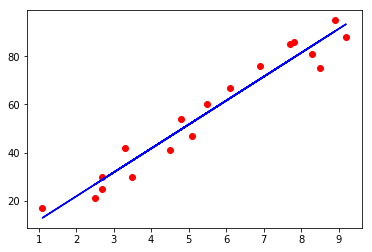

測試集結果:


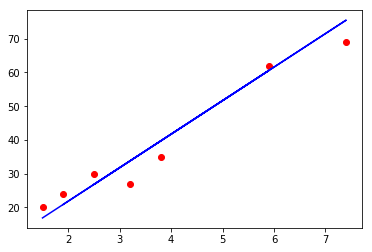

In [6]:
plt.scatter(X_train , Y_train, color = 'red')
plt.plot(X_train , regressor.predict(X_train), color ='blue')
print('訓練集結果:')
plt.show()
plt.scatter(X_test , Y_test, color = 'red')
plt.plot(X_test , regressor.predict(X_test), color ='blue')
print('測試集結果:')
plt.show()